In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df1 = pd.read_csv(f"/Users/folder_01/Git_tutorial/data_jobs.xlsx - Sheet1.csv")

## EDA part

In [6]:
df1.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills
0,Senior Data Scientist,Senior Data Scientist Data and Analytics Perfo...,"Bennington, NE",via ZipRecruiter,Full-time,False,Sudan,2023-04-24 09:51:15,False,True,Sudan,year,128050.0,NaN,Cox Communications,"['sql', 'python', 'aws', 'pyspark', 'tableau',..."
1,Data Engineer,Data Engineer - MA,"Mesa, AZ",via Indeed,Full-time,False,Georgia,2023-03-13 12:51:23,True,True,United States,year,140000.0,NaN,Worldgate LLC,"['sql', 'nosql', 'java', 'python', 'kafka', 's..."
2,Senior Data Analyst,Supervisory Information Technology Specialist ...,"Alexandria, VA",via ZipRecruiter,Full-time,False,"New York, United States",2023-07-05 07:03:38,True,False,United States,year,156000.0,NaN,National Technical Information Service,NaN
3,Machine Learning Engineer,Machine Learning Research Scientist,"Pittsburgh, PA",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-04-13 16:05:41,False,True,United States,year,140000.0,NaN,Bosch Group,"['pytorch', 'tensorflow']"
4,Data Scientist,"Data Scientist, AWS","Irving, TX",via Snagajob,Full-time and Part-time,False,"Texas, United States",2023-10-15 06:02:51,False,False,United States,hour,NaN,39.795002,"Presidio, Inc.","['python', 'r', 'sql', 'c', 'aws', 'gcp', 'big..."


In [7]:
df1.tail()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills
32667,Senior Data Scientist,Senior Data Scientist,"Palo Alto, CA",via Indeed,Full-time,False,"California, United States",2023-08-29 18:05:55,False,True,United States,year,191000.0,NaN,Navan,"['go', 'python', 'sql', 'numpy', 'pandas', 'te..."
32668,Data Analyst,eCommerce Data Analyst | Hybrid Work | W2 Acce...,"Austin, TX",via LinkedIn,Contractor,False,"Texas, United States",2023-03-15 19:01:41,False,False,United States,hour,NaN,42.5,"TalentBurst, an Inc 5000 company","['python', 'excel']"
32669,Data Scientist,Clinical Data Visualization Specialist - Remote,Anywhere,via ZipRecruiter,Full-time,True,"California, United States",2023-12-18 16:02:34,False,True,United States,hour,NaN,55.0,Avispa Technology,"['sas', 'sas', 'python']"
32670,Data Analyst,Data Analyst/Report Writer 2,"Austin, TX",via Adzuna,Full-time,False,"Texas, United States",2023-05-04 07:01:58,True,False,United States,hour,NaN,55.0,My3Tech,"['sas', 'sas', 'word', 'excel', 'sharepoint']"
32671,Data Scientist,Data Science Product Manager - Recommendations...,"Prague, Czechia",via Ai-Jobs.net,Full-time,False,Czechia,2023-03-31 20:02:52,False,False,Czechia,year,89100.0,NaN,Zeta Global,NaN


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32672 entries, 0 to 32671
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   job_title_short        32672 non-null  object 
 1   job_title              32672 non-null  object 
 2   job_location           32317 non-null  object 
 3   job_via                32662 non-null  object 
 4   job_schedule_type      32531 non-null  object 
 5   job_work_from_home     32672 non-null  bool   
 6   search_location        32672 non-null  object 
 7   job_posted_date        32672 non-null  object 
 8   job_no_degree_mention  32672 non-null  bool   
 9   job_health_insurance   32672 non-null  bool   
 10  job_country            32672 non-null  object 
 11  salary_rate            32672 non-null  object 
 12  salary_year_avg        22036 non-null  float64
 13  salary_hour_avg        10636 non-null  float64
 14  company_name           32672 non-null  object 
 15  jo

In [9]:
df1.describe()

,salary_year_avg,salary_hour_avg
count,22036.000000,10636.000000
mean,123192.041852,47.028800
std,48239.188733,21.847505
min,15000.000000,8.000000
25%,90000.000000,27.500000
50%,115000.000000,46.000000
75%,150000.000000,61.159996
max,960000.000000,391.000000


In [10]:
non_numeric_columns = df1.select_dtypes(include=['object', 'bool']).columns
non_numeric_stats = []

for col in non_numeric_columns:
    unique_values = df1[col].nunique()
    most_frequent_value = df1[col].mode()[0] if not df1[col].mode().empty else None
    most_frequent_count = df1[col].value_counts().iloc[0] if not df1[col].value_counts().empty else None
    non_numeric_stats.append([col, unique_values, most_frequent_value, most_frequent_count])

# Create a DataFrame for better readability
non_numeric_stats_df = pd.DataFrame(non_numeric_stats, columns=["Column", "Unique Values", "Most Frequent Value", "Frequency"])
non_numeric_stats_df

,Column,Unique Values,Most Frequent Value,Frequency
0,job_title_short,10,Data Analyst,9606
1,job_title,15285,Data Analyst,2375
2,job_location,2574,Anywhere,5960
3,job_via,595,via LinkedIn,6394
4,job_schedule_type,26,Full-time,25126
5,job_work_from_home,2,False,26712
6,search_location,116,"New York, United States",6226
7,job_posted_date,31767,2023-01-03 23:35:29,8
8,job_no_degree_mention,2,False,26441
9,job_health_insurance,2,False,20442


In [11]:
# Calculate descriptive statistics for numeric columns
# Specifically, include count, mean, standard deviation, min, 25th percentile, median, 75th percentile, and max

numeric_columns = df1.select_dtypes(include=['float64', 'int64']).columns
numeric_stats_df = df1[numeric_columns].describe().transpose().reset_index()

# Rename columns for better readability
numeric_stats_df.columns = [
    "Column", "Count", "Mean", "Standard Deviation", "Min", 
    "25th Percentile", "Median", "75th Percentile", "Max"
]
numeric_stats_df

,Column,Count,Mean,Standard Deviation,Min,25th Percentile,Median,75th Percentile,Max
0,salary_year_avg,22036.0,123192.041852,48239.188733,15000.0,90000.0,115000.0,150000.000000,960000.0
1,salary_hour_avg,10636.0,47.028800,21.847505,8.0,27.5,46.0,61.159996,391.0


## Data Cleaning part

In [12]:

# Check for duplicates
duplicates = df1.duplicated()
print("Number of duplicated rows:", duplicates.sum())

# Display duplicated rows if any
if duplicates.sum() > 0:
    print("Duplicated rows:")
    df1[duplicates]

# Remove duplicates
data_cleaned = df1.drop_duplicates()
print("Shape after removing duplicates:", data_cleaned.shape)

Number of duplicated rows: 1
Duplicated rows:
Shape after removing duplicates: (32671, 16)


In [13]:
# Remove "via" from the beginning of each entry in the job_via column
data_cleaned['job_via'] = data_cleaned['job_via'].str.replace(r'^via\s+', '', regex=True)

# Display the updated column to verify
print(data_cleaned['job_via'].head())

0    ZipRecruiter
1          Indeed
2    ZipRecruiter
3     Ai-Jobs.net
4        Snagajob
Name: job_via, dtype: object


/var/folders/ng/y3jq4z5556l47rj1150jg7jm0000gn/T/ipykernel_37710/2831127453.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['job_via'] = data_cleaned['job_via'].str.replace(r'^via\s+', '', regex=True)


In [14]:
data_cleaned_copy2 = data_cleaned.copy()

In [15]:
# Convert job_posted_date column to datetime format if it isn't already
data_cleaned_copy2['job_posted_date'] = pd.to_datetime(data_cleaned_copy2['job_posted_date'])

# Keep only the date part, remove the time
data_cleaned_copy2['job_posted_date'] = data_cleaned_copy2['job_posted_date'].dt.date

# Display the updated column to verify
print(data_cleaned_copy2['job_posted_date'].head())

0    2023-04-24
1    2023-03-13
2    2023-07-05
3    2023-04-13
4    2023-10-15
Name: job_posted_date, dtype: object


In [16]:
data_cleaned_copy2.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills
0,Senior Data Scientist,Senior Data Scientist Data and Analytics Perfo...,"Bennington, NE",ZipRecruiter,Full-time,False,Sudan,2023-04-24,False,True,Sudan,year,128050.0,NaN,Cox Communications,"['sql', 'python', 'aws', 'pyspark', 'tableau',..."
1,Data Engineer,Data Engineer - MA,"Mesa, AZ",Indeed,Full-time,False,Georgia,2023-03-13,True,True,United States,year,140000.0,NaN,Worldgate LLC,"['sql', 'nosql', 'java', 'python', 'kafka', 's..."
2,Senior Data Analyst,Supervisory Information Technology Specialist ...,"Alexandria, VA",ZipRecruiter,Full-time,False,"New York, United States",2023-07-05,True,False,United States,year,156000.0,NaN,National Technical Information Service,NaN
3,Machine Learning Engineer,Machine Learning Research Scientist,"Pittsburgh, PA",Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-04-13,False,True,United States,year,140000.0,NaN,Bosch Group,"['pytorch', 'tensorflow']"
4,Data Scientist,"Data Scientist, AWS","Irving, TX",Snagajob,Full-time and Part-time,False,"Texas, United States",2023-10-15,False,False,United States,hour,NaN,39.795002,"Presidio, Inc.","['python', 'r', 'sql', 'c', 'aws', 'gcp', 'big..."


In [17]:
# Remove brackets and quotes, then replace with a comma-separated string
data_cleaned_copy2['job_skills'] = data_cleaned_copy2['job_skills'].str.replace(r"[\[\]'\" ]", '', regex=True)

# Display the updated column to verify
print(data_cleaned_copy2['job_skills'].head())

0           sql,python,aws,pyspark,tableau,powerbi,git
1             sql,nosql,java,python,kafka,spark,hadoop
2                                                  NaN
3                                   pytorch,tensorflow
4    python,r,sql,c,aws,gcp,bigquery,hadoop,scikit-...
Name: job_skills, dtype: object


In [18]:
data_cleaned_copy2.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills
0,Senior Data Scientist,Senior Data Scientist Data and Analytics Perfo...,"Bennington, NE",ZipRecruiter,Full-time,False,Sudan,2023-04-24,False,True,Sudan,year,128050.0,NaN,Cox Communications,"sql,python,aws,pyspark,tableau,powerbi,git"
1,Data Engineer,Data Engineer - MA,"Mesa, AZ",Indeed,Full-time,False,Georgia,2023-03-13,True,True,United States,year,140000.0,NaN,Worldgate LLC,"sql,nosql,java,python,kafka,spark,hadoop"
2,Senior Data Analyst,Supervisory Information Technology Specialist ...,"Alexandria, VA",ZipRecruiter,Full-time,False,"New York, United States",2023-07-05,True,False,United States,year,156000.0,NaN,National Technical Information Service,NaN
3,Machine Learning Engineer,Machine Learning Research Scientist,"Pittsburgh, PA",Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-04-13,False,True,United States,year,140000.0,NaN,Bosch Group,"pytorch,tensorflow"
4,Data Scientist,"Data Scientist, AWS","Irving, TX",Snagajob,Full-time and Part-time,False,"Texas, United States",2023-10-15,False,False,United States,hour,NaN,39.795002,"Presidio, Inc.","python,r,sql,c,aws,gcp,bigquery,hadoop,scikit-..."


In [19]:
data_cleaned_copy2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32671 entries, 0 to 32671
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   job_title_short        32671 non-null  object 
 1   job_title              32671 non-null  object 
 2   job_location           32316 non-null  object 
 3   job_via                32661 non-null  object 
 4   job_schedule_type      32530 non-null  object 
 5   job_work_from_home     32671 non-null  bool   
 6   search_location        32671 non-null  object 
 7   job_posted_date        32671 non-null  object 
 8   job_no_degree_mention  32671 non-null  bool   
 9   job_health_insurance   32671 non-null  bool   
 10  job_country            32671 non-null  object 
 11  salary_rate            32671 non-null  object 
 12  salary_year_avg        22035 non-null  float64
 13  salary_hour_avg        10636 non-null  float64
 14  company_name           32671 non-null  object 
 15  job_ski

In [20]:
# Convert job_posted_date column to date type
data_cleaned_copy2['job_posted_date'] = pd.to_datetime(data_cleaned_copy2['job_posted_date'], format='mixed', errors='coerce')

# Verify the conversion
print(data_cleaned_copy2['job_posted_date'].head())
print("Data type of job_posted_date:", data_cleaned_copy2['job_posted_date'].dtype)

0   2023-04-24
1   2023-03-13
2   2023-07-05
3   2023-04-13
4   2023-10-15
Name: job_posted_date, dtype: datetime64[ns]
Data type of job_posted_date: datetime64[ns]


In [21]:
# Check for null values in each column
null_data = data_cleaned_copy2.isnull().sum()

# Display columns with their null counts
print("Total missing values:", null_data)

Total missing values: job_title_short              0
job_title                    0
job_location               355
job_via                     10
job_schedule_type          141
job_work_from_home           0
search_location              0
job_posted_date              0
job_no_degree_mention        0
job_health_insurance         0
job_country                  0
salary_rate                  0
salary_year_avg          10636
salary_hour_avg          22035
company_name                 0
job_skills                3187
dtype: int64


In [22]:
# Remove the specified columns ('salary_year_avg' and 'salary_hour_avg')
data_cleaned_copy2 = data_cleaned_copy2.drop(columns=['salary_year_avg', 'salary_hour_avg'])

# Verify the columns have been removed
print("Columns after removal:", data_cleaned_copy2.columns)

Columns after removal: Index(['job_title_short', 'job_title', 'job_location', 'job_via',
       'job_schedule_type', 'job_work_from_home', 'search_location',
       'job_posted_date', 'job_no_degree_mention', 'job_health_insurance',
       'job_country', 'salary_rate', 'company_name', 'job_skills'],
      dtype='object')


In [23]:
# Remove rows with any missing values
data_cleaned_copy2 = data_cleaned_copy2.dropna()

# Verify the changes
print("Total missing values after removal:", data_cleaned_copy2.isnull().sum().sum())
print("Shape after removing missing values:", data_cleaned_copy2.shape)

Total missing values after removal: 0
Shape after removing missing values: (29029, 14)


In [24]:
# Remove the specified columns ('salary_year_avg' and 'salary_hour_avg')
data_cleaned_copy2 = data_cleaned_copy2.drop(columns=['salary_rate'])

# Verify the columns have been removed
print("Columns after removal:", data_cleaned_copy2.columns)

Columns after removal: Index(['job_title_short', 'job_title', 'job_location', 'job_via',
       'job_schedule_type', 'job_work_from_home', 'search_location',
       'job_posted_date', 'job_no_degree_mention', 'job_health_insurance',
       'job_country', 'company_name', 'job_skills'],
      dtype='object')


In [25]:
data_cleaned_copy2.head(150)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,company_name,job_skills
0,Senior Data Scientist,Senior Data Scientist Data and Analytics Perfo...,"Bennington, NE",ZipRecruiter,Full-time,False,Sudan,2023-04-24,False,True,Sudan,Cox Communications,"sql,python,aws,pyspark,tableau,powerbi,git"
1,Data Engineer,Data Engineer - MA,"Mesa, AZ",Indeed,Full-time,False,Georgia,2023-03-13,True,True,United States,Worldgate LLC,"sql,nosql,java,python,kafka,spark,hadoop"
3,Machine Learning Engineer,Machine Learning Research Scientist,"Pittsburgh, PA",Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-04-13,False,True,United States,Bosch Group,"pytorch,tensorflow"
4,Data Scientist,"Data Scientist, AWS","Irving, TX",Snagajob,Full-time and Part-time,False,"Texas, United States",2023-10-15,False,False,United States,"Presidio, Inc.","python,r,sql,c,aws,gcp,bigquery,hadoop,scikit-..."
5,Data Engineer,Data Engineer,"Tysons, VA",Snagajob,Full-time and Part-time,False,Sudan,2023-10-10,False,False,Sudan,"LMI Consulting, LLC","python,java,sql,snowflake,pyspark,scikit-learn"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,Data Analyst,Data Analyst II (Healthcare Analytics),"Lake View Terrace, CA",WJHL Jobs,Full-time,False,"California, United States",2023-05-11,False,True,United States,Health Net,"sql,python,r,excel"
165,Data Scientist,Data Science Intern - Now Hiring,Anywhere,Snagajob,"Full-time, Part-time, and Internship",True,"Texas, United States",2023-10-12,False,True,United States,Experian,"python,r,java,c++,c"
166,Senior Data Scientist,"Senior Data Scientist, Customer Modeling - Now...","Miami, FL",Snagajob,Full-time and Part-time,False,Georgia,2023-11-05,False,False,United States,Lennar Corporation,"python,sql"
167,Data Scientist,Data Science Lead,Cyprus,Ai-Jobs.net,Full-time,False,Cyprus,2023-12-31,False,False,Cyprus,Palta,python


In [26]:
# Split the 'search_location' column into two new columns: 'state' and 'country'
data_cleaned_copy2[['search_state', 'search_country']] = data_cleaned_copy2['search_location'].str.split(',', expand=True)

# Strip any leading/trailing spaces from the new columns
data_cleaned_copy2['search_state'] = data_cleaned_copy2['search_state'].str.strip()
data_cleaned_copy2['search_country'] = data_cleaned_copy2['search_country'].str.strip()

# Verify the changes
print(data_cleaned_copy2[['search_location', 'search_state', 'search_country']].head())

           search_location search_state search_country
0                    Sudan        Sudan           None
1                  Georgia      Georgia           None
3  Illinois, United States     Illinois  United States
4     Texas, United States        Texas  United States
5                    Sudan        Sudan           None


In [27]:

data_cleaned_copy2 = data_cleaned_copy2.drop(columns=['search_location', 'state', 'country'])

# Verify the columns have been removed
print("Columns after removal:", data_cleaned_copy2.columns)

KeyError: "['state', 'country'] not found in axis"

In [ ]:
# Remove the state abbreviation (assuming two-letter state abbreviation at the end of the string)
data_cleaned_copy2['job_location'] = data_cleaned_copy2['job_location'].str.replace(r',\s?[A-Za-z]{2}$', '', regex=True)

# Verify the changes
print(data_cleaned_copy2[['job_location']].head())

  job_location
0   Bennington
1         Mesa
3   Pittsburgh
4       Irving
5       Tysons


In [ ]:
# Rename a column (e.g., change 'search_location' to 'location')
data_cleaned_copy2 = data_cleaned_copy2.rename(columns={'job_location': 'job_city'})

# Verify the change
print(data_cleaned_copy2.columns)

Index(['job_title_short', 'job_title', 'job_city', 'job_via',
       'job_schedule_type', 'job_work_from_home', 'job_posted_date',
       'job_no_degree_mention', 'job_health_insurance', 'job_country',
       'company_name', 'job_skills', 'search_state', 'search_country'],
      dtype='object')


In [ ]:
data_cleaned_copy2.isnull().sum()

job_title_short              0
job_title                    0
job_city                     0
job_via                      0
job_schedule_type            0
job_work_from_home           0
job_posted_date              0
job_no_degree_mention        0
job_health_insurance         0
job_country                  0
company_name                 0
job_skills                   0
search_state                 0
search_country           10049
dtype: int64

In [ ]:
data_cleaned_copy2.shape

(29029, 14)

In [ ]:
# Remove rows with any missing values
data_cleaned_copy2 = data_cleaned_copy2.dropna()

# Verify the changes
print("Total missing values after removal:", data_cleaned_copy2.isnull().sum().sum())
print("Shape after removing missing values:", data_cleaned_copy2.shape)

Total missing values after removal: 0
Shape after removing missing values: (18980, 14)


## Data visualization

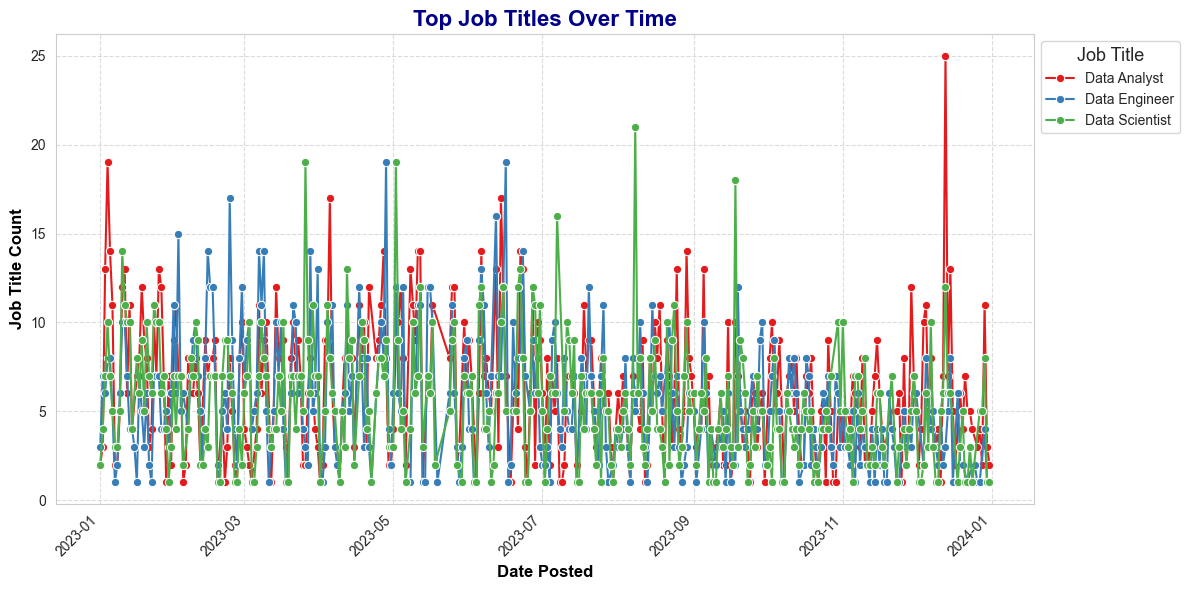

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure 'job_posted_date' is in datetime format
data_cleaned_copy2['job_posted_date'] = pd.to_datetime(data_cleaned_copy2['job_posted_date'])

# Count occurrences of each job title by date
job_counts = data_cleaned_copy2.groupby(['job_posted_date', 'job_title']).size().reset_index(name='count')

# Optionally, filter to the most frequent job titles (e.g., top 3)
top_job_titles = job_counts['job_title'].value_counts().nlargest(3).index
job_counts = job_counts[job_counts['job_title'].isin(top_job_titles)]

# Plotting the line chart
plt.figure(figsize=(12, 6))  # Set figure size smaller to avoid large image

# Create a line plot
sns.lineplot(data=job_counts, x='job_posted_date', y='count', hue='job_title', marker='o', palette='Set1')

# Customize the plot for a professional look
plt.title('Top Job Titles Over Time', fontsize=16, fontweight='bold', color='darkblue')  # Title
plt.xlabel('Date Posted', fontsize=12, fontweight='bold', color='black')  # X-axis label
plt.ylabel('Job Title Count', fontsize=12, fontweight='bold', color='black')  # Y-axis label
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate x-axis labels for readability
plt.yticks(fontsize=10)  # Y-axis font size
plt.grid(True, linestyle='--', alpha=0.7)  # Add gridlines for better readability
plt.legend(title='Job Title', title_fontsize='13', loc='upper left', bbox_to_anchor=(1, 1))  # Legend formatting

# Enhance the overall appearance
sns.set_style('whitegrid')  # Use Seaborn style for clean background
sns.set_palette('husl')  # Set a professional color palette

# Show the plot
plt.tight_layout()  # Adjust layout for better fitting
plt.show()

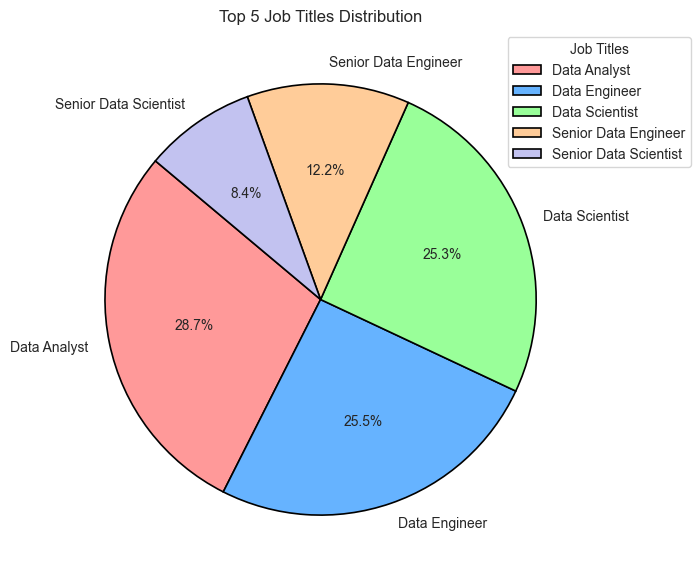

In [67]:
import pandas as pd
import matplotlib.pyplot as plt


# Count the occurrences of each unique job title and get the top 5
top_jobs = data_cleaned_copy2['job_title'].value_counts().head(5)

# Define colors for each job title
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']

# Create a pie chart for the top five job titles
plt.figure(figsize=(20, 7))
plt.pie(top_jobs, labels=top_jobs.index, autopct='%1.1f%%', startangle=140, 
        colors=colors, wedgeprops={'edgecolor': 'black', 'linewidth': 1.2})

# Add a title
plt.title('Top 5 Job Titles Distribution')

# Add a legend in the upper right corner
plt.legend(top_jobs.index, title="Job Titles", loc="upper right", bbox_to_anchor=(1.2, 1))

# Display the chart
plt.show()

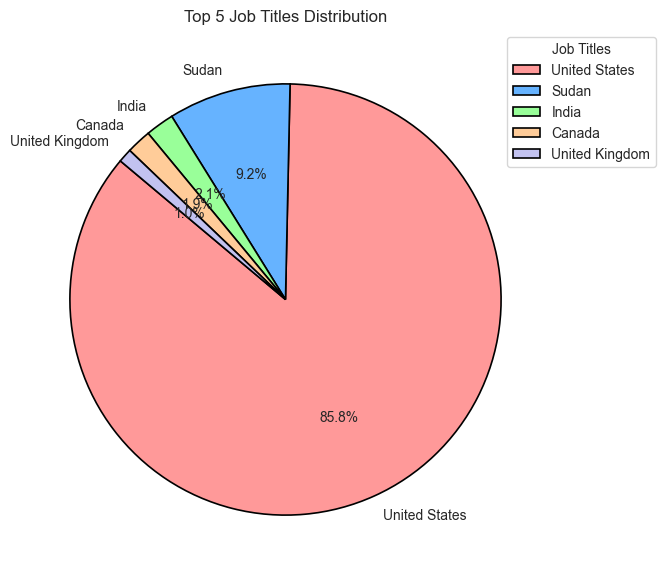

In [69]:
# Count the occurrences of each unique job title and get the top 5

top_jobs = data_cleaned_copy2['job_country'].value_counts().head(5)

# Define colors for each job title
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']

# Create a pie chart for the top five job titles
plt.figure(figsize=(20, 7))
plt.pie(top_jobs, labels=top_jobs.index, autopct='%1.1f%%', startangle=140, 
        colors=colors, wedgeprops={'edgecolor': 'black', 'linewidth': 1.2})

# Add a title
plt.title('Top 5 Job Titles Distribution')

# Add a legend in the upper right corner
plt.legend(top_jobs.index, title="Job Titles", loc="upper right", bbox_to_anchor=(1.2, 1))

# Display the chart
plt.show()

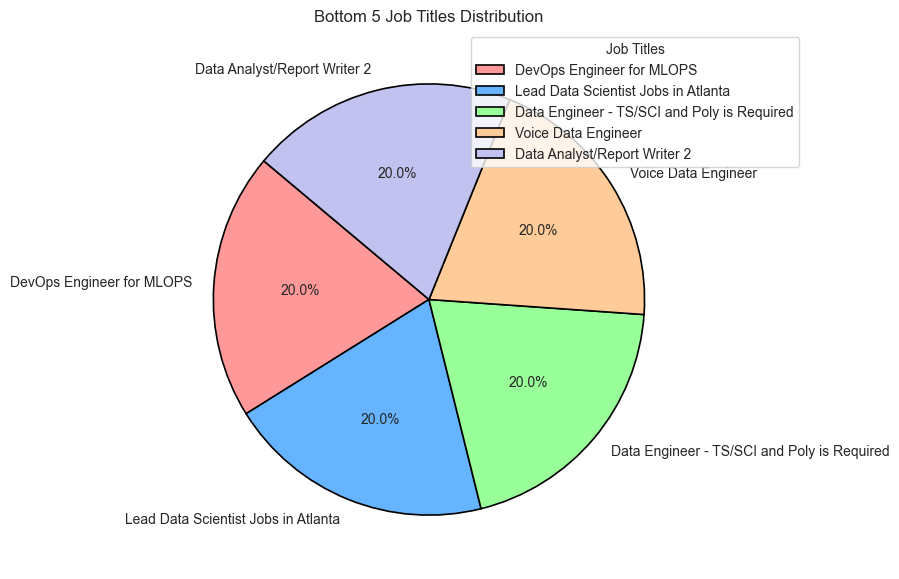

In [68]:
import pandas as pd
import matplotlib.pyplot as plt


# Count the occurrences of each unique job title and get the bottom 5 (least frequent)
bottom_jobs = data_cleaned_copy2['job_title'].value_counts().tail(5)

# Define colors for each job title
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']

# Create a pie chart for the five job titles with the lowest percentages
plt.figure(figsize=(20, 7))  # Adjust the width by changing the first number if needed
plt.pie(bottom_jobs, labels=bottom_jobs.index, autopct='%1.1f%%', startangle=140, 
        colors=colors, wedgeprops={'edgecolor': 'black', 'linewidth': 1.2})

# Add a title
plt.title('Bottom 5 Job Titles Distribution')

# Add a legend in the upper right corner
plt.legend(bottom_jobs.index, title="Job Titles", loc="upper right", bbox_to_anchor=(1.2, 1))

# Display the chart
plt.show()

<Figure size 1200x800 with 0 Axes>

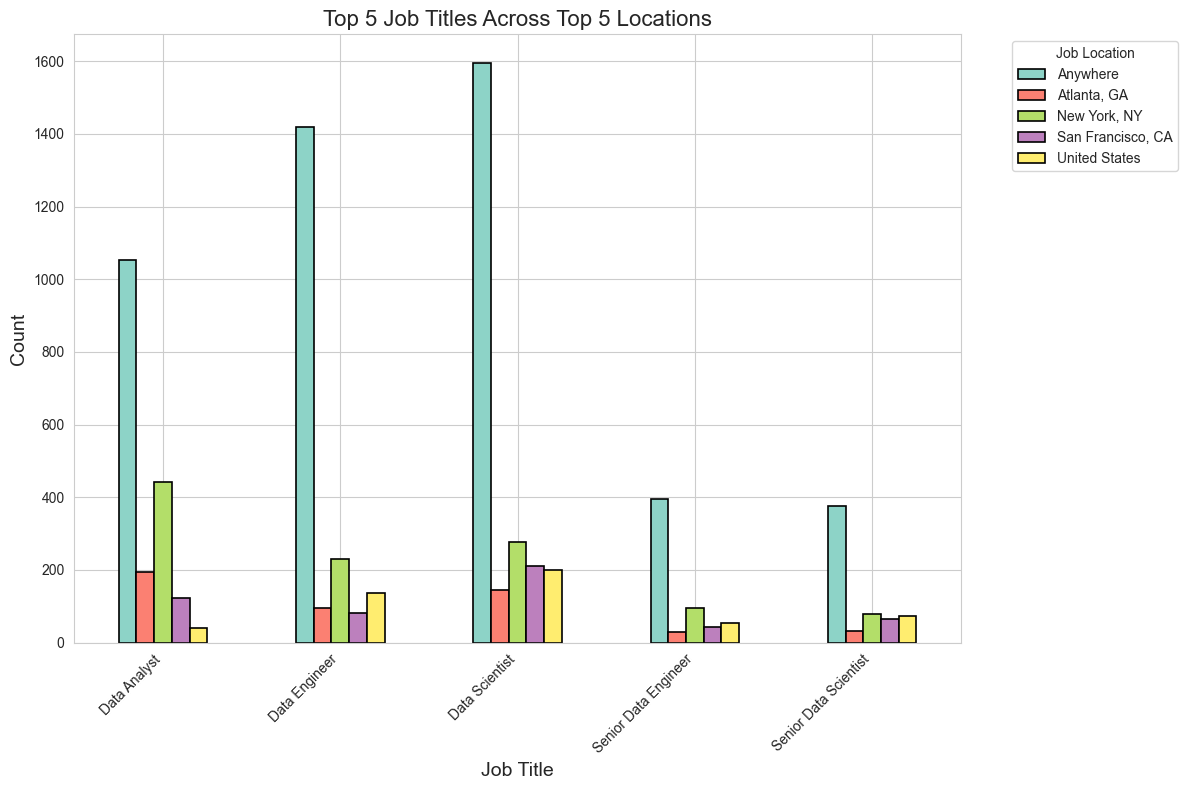

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Get the top 5 job titles and locations
top_titles = data_cleaned_copy2['job_title_short'].value_counts().head(5).index
top_locations = data_cleaned_copy2['job_location'].value_counts().head(5).index

# Filter data to include only the top titles and locations
filtered_data = data_cleaned_copy2[data_cleaned_copy2['job_title_short'].isin(top_titles) & data_cleaned_copy2['job_location'].isin(top_locations)]

# Group by job title and location, then count occurrences
grouped_data = filtered_data.groupby(['job_title_short', 'job_location']).size().unstack(fill_value=0)

# Plot settings
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
grouped_data.plot(kind='bar', stacked=False, colormap="Set3", edgecolor="black", linewidth=1.2, figsize=(12, 8))

# Chart title and labels
plt.title('Top 5 Job Titles Across Top 5 Locations', fontsize=16)
plt.xlabel('Job Title', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right')

# Legend outside of the plot
plt.legend(title="Job Location", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [58]:
data_cleaned_copy2.head(5)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,company_name,job_skills,search_state,search_country
0,Senior Data Scientist,Senior Data Scientist Data and Analytics Perfo...,"Bennington, NE",ZipRecruiter,Full-time,False,Sudan,2023-04-24,False,True,Sudan,Cox Communications,"sql,python,aws,pyspark,tableau,powerbi,git",Sudan,None
1,Data Engineer,Data Engineer - MA,"Mesa, AZ",Indeed,Full-time,False,Georgia,2023-03-13,True,True,United States,Worldgate LLC,"sql,nosql,java,python,kafka,spark,hadoop",Georgia,None
3,Machine Learning Engineer,Machine Learning Research Scientist,"Pittsburgh, PA",Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-04-13,False,True,United States,Bosch Group,"pytorch,tensorflow",Illinois,United States
4,Data Scientist,"Data Scientist, AWS","Irving, TX",Snagajob,Full-time and Part-time,False,"Texas, United States",2023-10-15,False,False,United States,"Presidio, Inc.","python,r,sql,c,aws,gcp,bigquery,hadoop,scikit-...",Texas,United States
5,Data Engineer,Data Engineer,"Tysons, VA",Snagajob,Full-time and Part-time,False,Sudan,2023-10-10,False,False,Sudan,"LMI Consulting, LLC","python,java,sql,snowflake,pyspark,scikit-learn",Sudan,None
